# Tabula Muris Data

link to data: https://s3.amazonaws.com/czbiohub-tabula-muris/TabulaMuris.zip

In [96]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import time
import pandas as pd
import scanpy
from sklearn.decomposition import PCA
import umap
import trimap

labels = pd.read_csv('data/TM_facs_metadata.csv')
X = scanpy.anndata.read_h5ad('data/TM_facs_mat.h5ad').X.T

In [97]:
tissue = labels['tissue'].values
names = {}
L = []
cnt = 0
for t in tissue:
    if t not in names:
        names[t] = cnt
        cnt +=1
    L.append(names[t])
L = np.array(L, dtype=np.int32)
num_class = cnt

## TriMap Result

In [26]:
y = trimap.TRIMAP(n_iters=1500).fit_transform(X)

TRIMAP(n_inliers=50, n_outliers=5, n_random=5, lr=1000.0, n_iters=1500, weight_adj=False, verbose=True, return_seq=False)
running TriMap on 53760 points with dimension 23433
pre-processing
found nearest neighbors
sampled triplets
running TriMap
Iteration:  100, Loss: 482495.258, Violated triplets: 3.5196
Iteration:  200, Loss: 272553.447, Violated triplets: 1.9882
Iteration:  300, Loss: 169876.188, Violated triplets: 1.2392
Iteration:  400, Loss: 119852.066, Violated triplets: 0.8743
Iteration:  500, Loss: 104272.476, Violated triplets: 0.7606
Iteration:  600, Loss: 96471.394, Violated triplets: 0.7037
Iteration:  700, Loss: 93459.755, Violated triplets: 0.6818
Iteration:  800, Loss: 91224.023, Violated triplets: 0.6654
Iteration:  900, Loss: 89460.894, Violated triplets: 0.6526
Iteration: 1000, Loss: 87640.196, Violated triplets: 0.6393
Iteration: 1100, Loss: 86241.738, Violated triplets: 0.6291
Iteration: 1200, Loss: 85001.935, Violated triplets: 0.6201
Iteration: 1300, Loss: 84151.1

Scatter plot of the embedding reveals many outliers in the data.

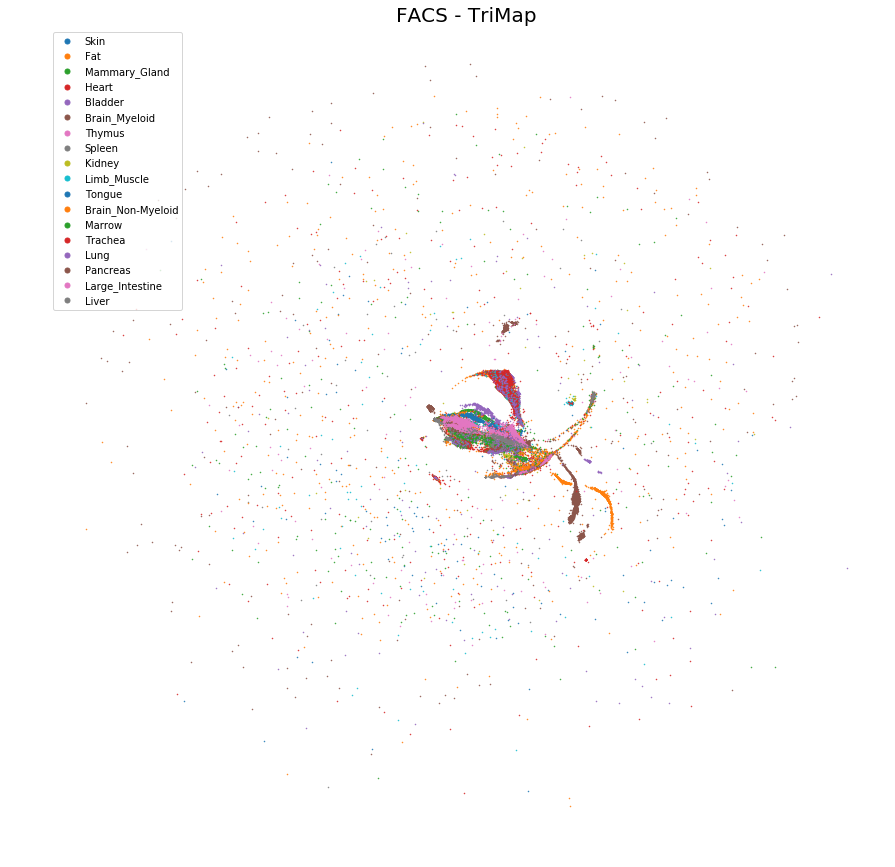

In [88]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for i, name in enumerate(names):
    plt.plot(y[L==i,0], y[L==i,1], '.', label=name, markersize=1)
plt.axis('off')
plt.title('FACS - TriMap', fontdict ={'fontsize':20})
lgnd = plt.legend(loc='upper left')
for i in range(num_class):
    lgnd.legendHandles[i]._legmarker.set_markersize(10)
plt.show()

The main structure is revealed by zooming in.

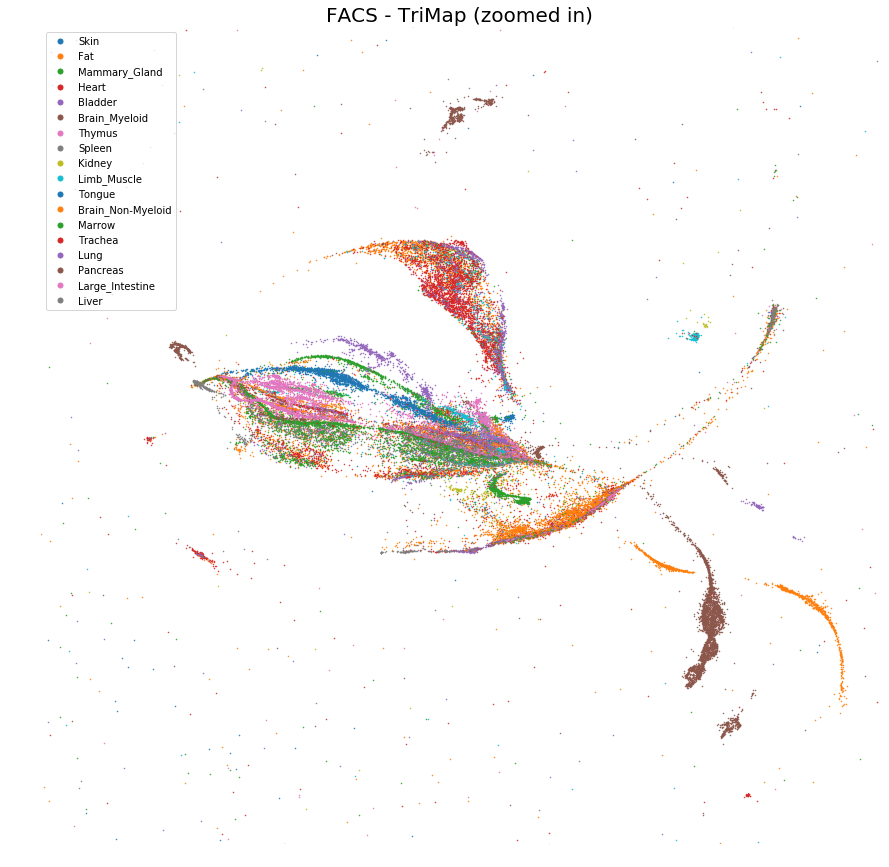

In [95]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
handles = []
for i, name in enumerate(names):
    plt.plot(y[L==i,0], y[L==i,1], '.', label=name, markersize=1)
plt.xlim(-500,500)
plt.ylim(-650,650)
plt.title('FACS - TriMap (zoomed in)', fontdict ={'fontsize':20})
plt.axis('off')
lgnd = plt.legend(loc='upper left')
for i in range(num_class):
    lgnd.legendHandles[i]._legmarker.set_markersize(10)
plt.show()

## PCA Result

In [98]:
y_pca = PCA(n_components = 2).fit_transform(X)

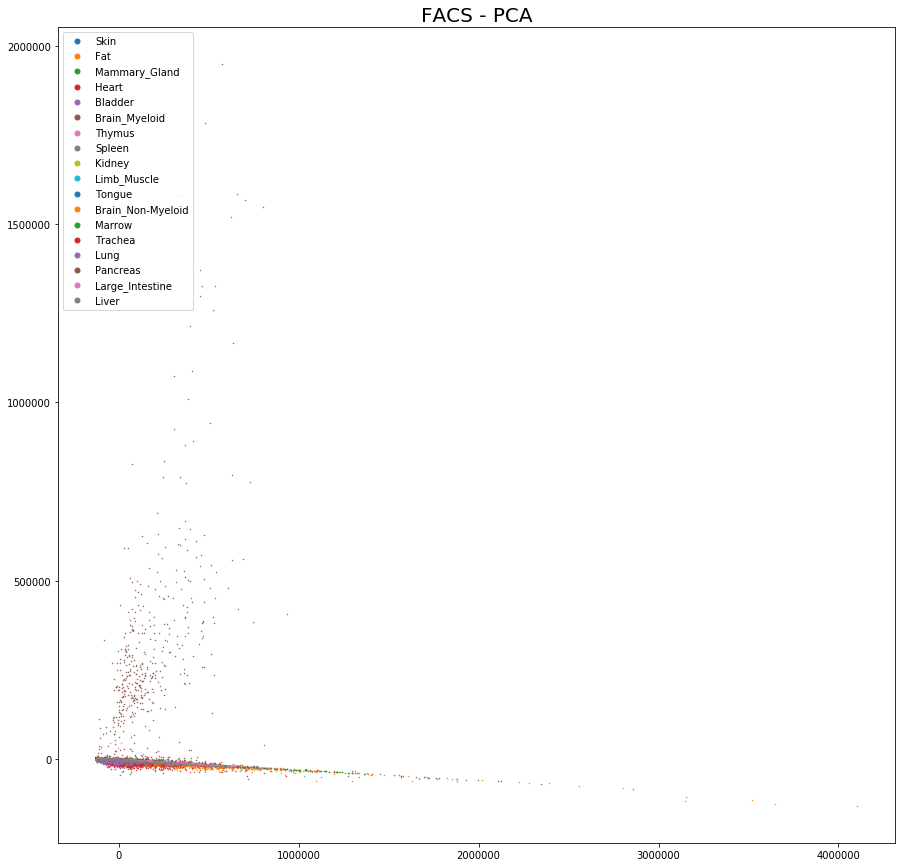

In [100]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
handles = []
for i, name in enumerate(names):
    plt.plot(y_pca[L==i,0], y_pca[L==i,1], '.', label=name, markersize=1)
plt.title('FACS - PCA', fontdict ={'fontsize':20})
plt.axis('off')
lgnd = plt.legend(loc='upper left')
for i in range(num_class):
    lgnd.legendHandles[i]._legmarker.set_markersize(10)
plt.show()

## UMAP Result

UMAP takes a very long time on dataset with large number of dimension. Therefore, we need to reduce the dimensions using PCA.

In [93]:
Xr = PCA(n_components=100, random_state=0).fit_transform(X)
y_umap = umap.UMAP().fit_transform(Xr)

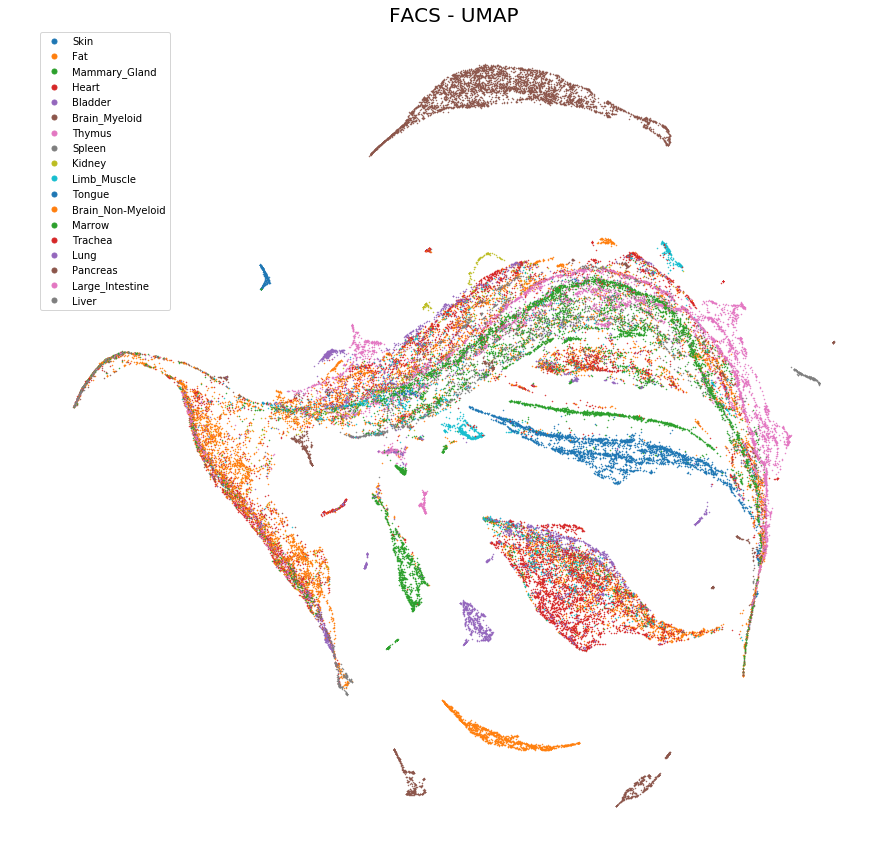

In [94]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
handles = []
for i, name in enumerate(names):
    plt.plot(y_umap[L==i,0], y_umap[L==i,1], '.', label=name, markersize=1)
plt.title('FACS - UMAP', fontdict ={'fontsize':20})
plt.axis('off')
lgnd = plt.legend(loc='upper left')
for i in range(num_class):
    lgnd.legendHandles[i]._legmarker.set_markersize(10)
plt.show()